INSTALL NEW PACKAGES

In [1]:
pip install tensorflow pandas numpy matplotlib opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
# Load and Preprocess the data
batch_size = 32
img_height = 48
img_width = 48

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/train',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = 'grayscale'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = 'grayscale'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/val',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = 'grayscale'
)

# normalizing the ds

normalization_layer = tf.keras.layers.Rescaling(1./255)

# mapping(encoding the ds)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), tf.one_hot(y, depth = 7)))

test_ds = test_ds.map(lambda x, y: (normalization_layer(x), tf.one_hot(y, depth = 7)))

val_ds = val_ds.map(lambda x, y: (normalization_layer(x), tf.one_hot(y, depth = 7)))

Found 28709 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.


In [8]:
# Build the model (calling a CNN class known as sequential)

model = Sequential([
    Conv2D(32,(3,3), activation = 'relu',input_shape = (img_height, img_width,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(7,activation = 'softmax')
    ])
 
model.compile(optimizer ='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
    


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# TRAIN THE MODEL
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 30
)

Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.2540 - loss: 1.7951 - val_accuracy: 0.4296 - val_loss: 1.4956
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.4073 - loss: 1.5232 - val_accuracy: 0.4823 - val_loss: 1.3463
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.4652 - loss: 1.3913 - val_accuracy: 0.4948 - val_loss: 1.3092
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.4949 - loss: 1.3160 - val_accuracy: 0.5224 - val_loss: 1.2508
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.5201 - loss: 1.2633 - val_accuracy: 0.5302 - val_loss: 1.2315
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.5388 - loss: 1.2122 - val_accuracy: 0.5274 - val_loss: 1.2338
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.5548 - loss: 1.1731 - val_accuracy: 0.5447 - val_loss: 1.2037
Epoch 8/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.5635 - loss: 1.1361 - 

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}') 

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5598 - loss: 1.6396
Test Loss: 1.6749615669250488
Test Accuracy: 0.5572583079338074


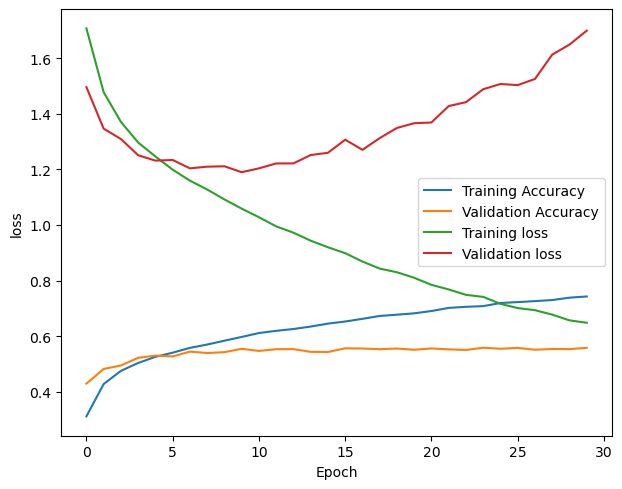

In [12]:
# visualize training hostory
plt.figure(figsize=(12,5))
# plot acuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plot loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
# prediction (inference)
def predict_emotion(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(48,48))
    img = img.reshape(1,48,48,1)/255.0
    prediction = model.predict(img)
    emotion_label = ['Angry','Disgust','Fear','Happy','Sad','Suprise']
    predicted_emotion = emotion_label[np.argmax(prediction)]
    return predicted_emotion

In [36]:
# Example
image_path = 'image2.jpg'
predicted_emotion = predict_emotion(image_path)
print(f'Predicted Emotion: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Emotion: Happy


In [37]:
# Example
image_path = 'image1.jpg'
predicted_emotion = predict_emotion(image_path)
print(f'Predicted Emotion: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Emotion: Sad


In [38]:
# Example
image_path = 'image3.jpg'
predicted_emotion = predict_emotion(image_path)
print(f'Predicted Emotion: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Emotion: Happy


In [39]:
# Example
image_path = 'image4.jpg'
predicted_emotion = predict_emotion(image_path)
print(f'Predicted Emotion: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Emotion: Happy


In [40]:
# Example
image_path = 'image5.jpg'
predicted_emotion = predict_emotion(image_path)
print(f'Predicted Emotion: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Emotion: Happy
